<a href="https://colab.research.google.com/github/jangalasriramd7/MachineLearning/blob/main/Linear_Regression_on_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
housing = pd.read_csv('DB_RS.csv')
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
housing.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


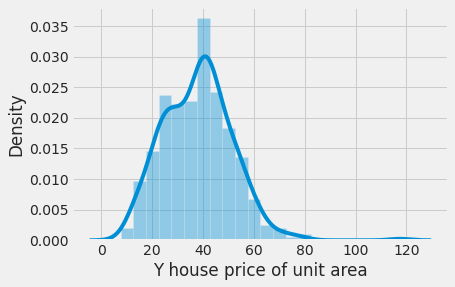

In [ ]:
sns.distplot(housing['Y house price of unit area'])

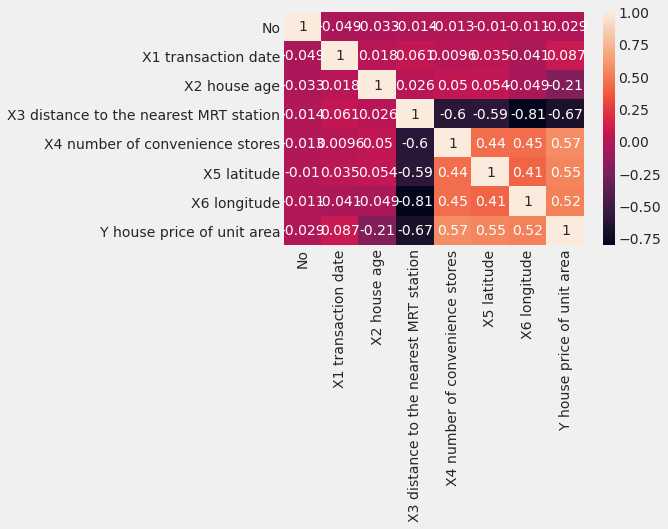

In [ ]:
sns.heatmap(housing.corr(), annot=True)

In [ ]:
X = housing[['X3 distance to the nearest MRT station',	'X4 number of convenience stores']] # using most suitable 2 columns which effects the output
y = housing['Y house price of unit area']

In [ ]:
from sklearn.model_selection import train_test_split             #importing sklearn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)  # Defining the train and test variables X and y for 70% data

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)            # cross validating the model
    return pred.mean()

def print_evaluate(true, predicted):                     # determining the mean square error, mean absolute error, root mean square and printing them
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):                           # Evaluating and analysing the true and predicted values 
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)                # Linear regression model is used. Fitting the X and Y variables into it
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
print(lin_reg.intercept_)                        # print the intercept value

39.43276247542683


In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])                # coeffiecient of X columns that affect the target y column
coeff_df

,Coefficient
X3 distance to the nearest MRT station,-0.005841
X4 number of convenience stores,1.297097


In [ ]:
pred = lin_reg.predict(X_test)

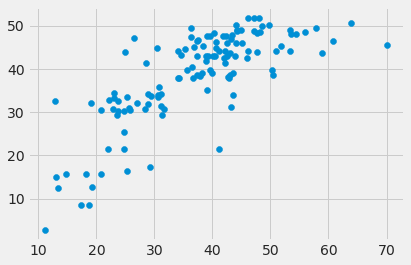

In [ ]:
plt.scatter(y_test, pred)        # scattered plot of y and pred

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


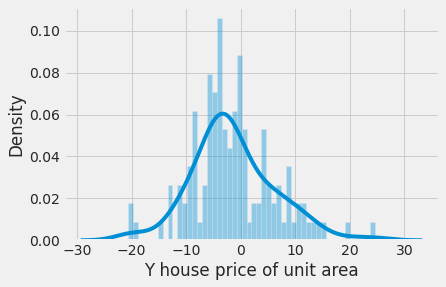

In [ ]:
sns.distplot((y_test - pred), bins=50);        # sns plot of y and pred

In [ ]:
print_evaluate(y_test, lin_reg.predict(X_test))        # values of MSE , MAE, RMSE

MAE: 6.041804900805232
MSE: 59.224411830029766
RMSE: 7.69573984942512
R2 Square 0.5526056809252293


In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df              # metrics of all errors

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,6.041805,59.224412,7.69574,0.552606,0.503808
